In [32]:
import matplotlib.pyplot as plt
import scipy.integrate as sp
import numpy as np
import pysindy as ps




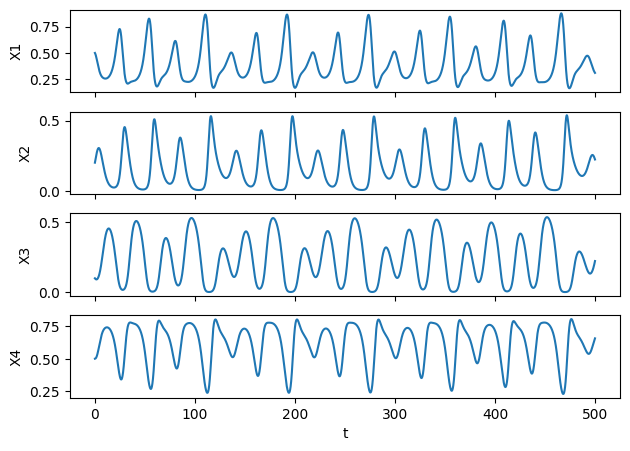

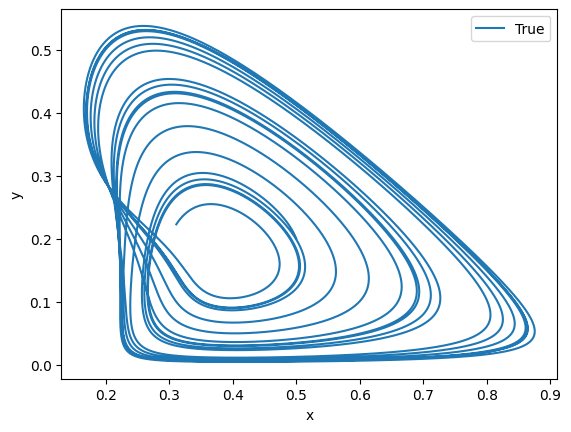

In [33]:
# Step 1: Generate data
def lorenz(t, y):
    y1, y2, y3, y4 = y
    return [
        y1*(1-y1-2*y2-1.3*y3),
        y2*(1-y2-y3-y4),
        y3*(1-2*y1-y3),
        y4*(1-y1-y4)
    ]

dt = 0.001
t = np.arange(0, 500, dt)

X0 = [0.5, 0.2, 0.1, 0.5]

X = sp.odeint(lambda t, y: lorenz(t, y), X0, t, tfirst=True)
n = X.shape[1]



# plot orbit
plt.ion()
fig = plt.figure()

for i in range(0, n):
    plt.subplot(n, 1, i+1)
    plt.plot(t, X[:, i])
    plt.ylabel('X'+str(i+1))
    
    if i < n-1: 
        plt.tick_params(axis='x', labelbottom=False)

plt.xlabel('t')
plt.show()


plt.figure()
plt.plot(X[:, 0], X[:, 1], label='True')
   
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Step 1: Using finite differences to obtain the derivative matrix. | Mainly used for noise-free orbits.
differentiation_method = ps.FiniteDifference(order=2)


In [34]:
# Step 2: Build basis library
feature_library = ps.PolynomialLibrary(degree=2)


In [35]:
# Step 3: Solve
optimizer = ps.STLSQ(threshold=0.25)

model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
)

model.fit(X, t=t)

model.print(precision=6)

(x[0])' = 1.000000 * x[0] - 1.000000 * x[0]*x[0] - 2.000000 * x[0]*x[1] - 1.300000 * x[0]*x[2]
(x[1])' = 1.000000 * x[1] - 1.000000 * x[1]*x[1] - 1.000000 * x[1]*x[2] - 1.000000 * x[1]*x[3]
(x[2])' = 1.000000 * x[2] - 2.000000 * x[0]*x[2] - 1.000000 * x[2]*x[2]
(x[3])' = 1.000000 * x[3] - 1.000000 * x[0]*x[3] - 1.000000 * x[3]*x[3]


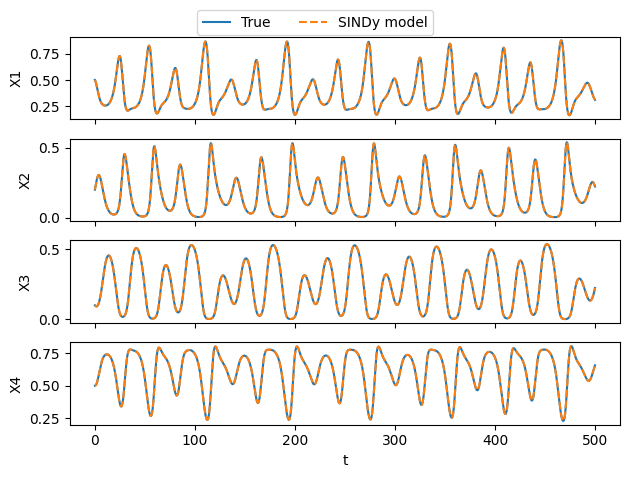

In [36]:
#Step 4: Evaluate

# x0, y0, z0 = X0
sim = model.simulate(X0, t=t)

# plot orbit
plt.ion()

fig = plt.figure()
for i in range(0, n):
    plt.subplot(n, 1, i+1)
    plt.plot(t, X[:, i], label='True')
    plt.plot(t, sim[:, i], '--', label='SINDy model')
    plt.ylabel('X'+str(i+1))

    if i < n-1: 
        plt.tick_params(axis='x', labelbottom=False)

plt.xlabel('t')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)

plt.tight_layout()
plt.subplots_adjust(top=0.93)

plt.show()

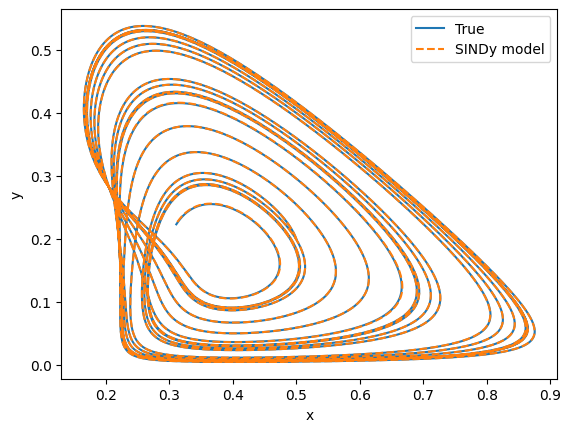

In [37]:
plt.figure()
plt.plot(X[:, 0], X[:, 1], label='True')
plt.plot(sim[:, 0], sim[:, 1], '--', label='SINDy model')
   
plt.legend(loc='upper right')

plt.xlabel('x')
plt.ylabel('y')
plt.show()